In [1]:
import os

base_dir = ('/home/cialyni/Рабочий стол/spbu_programming_4_sem/src/KNN') 
os.chdir(base_dir)

import pandas as pd
import matplotlib.pyplot as plt
from processing import MinMaxScaler, MaxAbsScaler, Metrics, train_test_split
from classifier import KNNClassifier

In [2]:
spam_df = pd.read_csv('datas/spam.csv')
spam_df = spam_df.sample(frac=1).reset_index(drop=True)
spam_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.00,0.00,0.0,0.00,0.00,1.78,0.00,0.0,1.78,...,0.000,0.000,0.0,0.000,0.000,0.000,7.000,35,63,0
1,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.34,0.0,0.00,...,0.283,0.107,0.0,0.000,0.053,0.000,1.864,32,910,1
2,0.00,0.00,0.42,0.0,0.42,0.00,0.21,0.00,0.0,0.00,...,0.000,0.126,0.0,0.031,1.269,0.412,13.017,183,1484,1
3,0.52,0.00,1.05,0.0,0.00,1.05,0.00,0.00,0.0,0.52,...,0.000,0.000,0.0,2.295,0.698,0.000,2.016,14,125,1
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,2.848,51,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
4597,0.00,0.34,1.02,0.0,0.68,0.34,0.34,0.00,0.0,0.00,...,0.000,0.167,0.0,0.222,0.000,4.008,6.978,56,328,1
4598,0.00,0.00,0.00,0.0,1.11,0.00,0.00,0.55,0.0,3.91,...,0.000,0.000,0.0,0.085,0.000,0.000,1.142,5,48,0
4599,0.00,0.00,0.00,0.0,3.09,0.00,1.03,1.03,0.0,1.03,...,0.000,0.000,0.0,0.000,0.000,0.000,10.692,65,139,1


In [3]:
X = spam_df.drop('label', axis=1).values 
y = spam_df['label'].values
X_train, y_train, X_test, y_test = train_test_split(
    X, y, 
    test_size=0.2,           
    random_state=42,         
    shuffle=True             
)


In [4]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'No Scaling': None  }

k_values = range(1, 8)
results = {}

In [5]:
for scaler_name, scaler in scalers.items():
    if scaler:
        X_train_processed = scaler.fit_transform(X_train)
        X_test_processed = scaler.transform(X_test)
    else:
        X_train_processed = X_train.copy()
        X_test_processed = X_test.copy()
    
    accuracies = []
    f1_scores = []
    
    for k in k_values:
        knn = KNNClassifier(k=k, leaf_size=20)
        knn.fit(X_train_processed, y_train)
        y_pred = knn.predict(X_test_processed)
        accuracy = Metrics.accuracy(y_pred, y_test)
        f1 = Metrics.f1_score(y_pred, y_test)
        accuracies.append(accuracy)
        f1_scores.append(f1)

    results[scaler_name] = {
        'accuracies': accuracies,
        'f1_scores': f1_scores,
    }

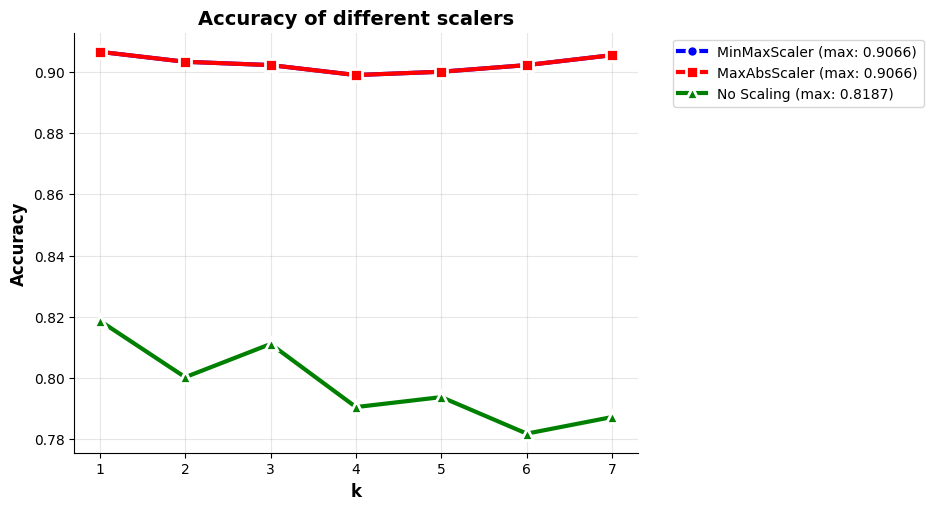

In [8]:
plt.figure(figsize=(16, 12))  
plt.subplot(2, 2, 1)
colors = ['blue', 'red', 'green']  
markers = ['o', 's', '^']  
for i, (scaler_name, result) in enumerate(results.items()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(k_values, result['accuracies'], 
             marker=marker, 
             color=color, 
             linewidth=3, 
             markersize=8, 
             markeredgewidth=2,
             markeredgecolor='white',
             label=f'{scaler_name} (max: {max(result["accuracies"]):.4f})')

plt.xlabel('k', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy of different scalers', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True, alpha=0.3)
plt.xticks(k_values) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

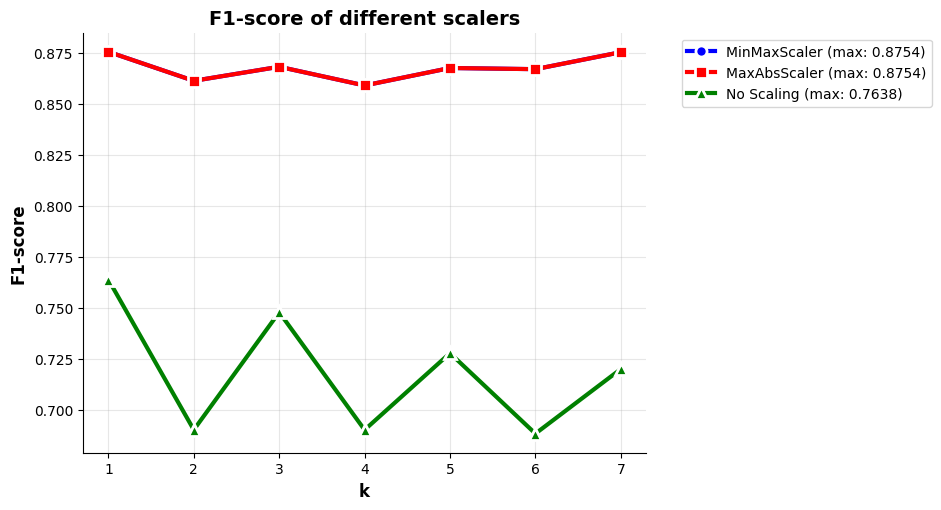

In [9]:
plt.figure(figsize=(16, 12))  
plt.subplot(2, 2, 2)
for i, (scaler_name, result) in enumerate(results.items()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(k_values, result['f1_scores'], 
             marker=marker, 
             color=color, 
             linewidth=3, 
             markersize=8, 
             markeredgewidth=2,
             markeredgecolor='white',
             label=f'{scaler_name} (max: {max(result["f1_scores"]):.4f})')

plt.xlabel('k', fontsize=12, fontweight='bold')
plt.ylabel('F1-score', fontsize=12, fontweight='bold')
plt.title('F1-score of different scalers', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Оба способоа масштабирования показали одинаковый результат, лучший чем при его остутствии. Наибольшие F1-score и Accuracy были получены при k = 1